In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import ranksums
import scipy.stats as ss
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
###Continuous Variables
mydata_n = pd.read_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/sage_data.xlsx",sheetname=1)
mydata_outcome=pd.read_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/sage_data.xlsx",sheetname=6)
groups=mydata_outcome.as_matrix(columns=mydata_outcome.columns[1:])
covariates_n=mydata_n.drop(['record_id'],axis=1)


In [4]:
###Univariate Analysis: Wilcoxon Rank Sum Test

def rank_test(covariates, groups):
    """ 
    Wilcoxon rank-sum test 
    
    Parameters
    ----------
    covariates : DataFrame 
        Dataframe with one covariate per column.
    groups : array-like
        discharge alive on day 28
    
    Returns
    -------
    A list of p-values, one for each column in covariates
    """    
    colnames = list(covariates.columns)
    J = len(colnames)
    pvalues = np.zeros(J)
    for j in range(J):
        var = covariates[colnames[j]]
        res = ranksums(var[groups[:,0] == 1], var[groups[:,0] == 0])
        pvalues[j] = res.pvalue
    return pvalues 


pvalues_ranksum=pd.DataFrame(rank_test(covariates_n, groups),index=list(covariates_n.columns), columns=['pvalue_wilcoxon'])




In [12]:
###Univariate Analysis: Two Sample T-test
def t_test(covariates, groups):
    """ 
    Two-Sample t-test
    
    Parameters
    ----------
    covariates : DataFrame 
        Dataframe with one covariate per column.
        
    groups : array-like
        
        Discharge alive on day 28
    Returns
    -------
    A list of p-values, one for each column in covariates
    """    
    colnames = list(covariates.columns)
    J = len(colnames)
    pvalues = np.zeros(J)
    for j in range(J):
        var = covariates[colnames[j]]
        res= ss.ttest_ind(var[groups[:,0] == 1], var[groups[:,0] == 0],equal_var=False, nan_policy='omit')
        pvalues[j] = res.pvalue
    return pvalues 


pvalues_ttest=pd.DataFrame(t_test(covariates_n, groups),index=list(covariates_n.columns), columns=['pvalue_ttest'])
pvalues_n=pd.concat([pvalues_ranksum, pvalues_ttest],axis=1)

def alert(c):
  if 0<= c['pvalue_wilcoxon'] <0.05 and  0<=c['pvalue_ttest'] <0.05:
    return 'Both'
  if 0<= c['pvalue_wilcoxon'] <0.05 and  c['pvalue_ttest'] >0.05:
    return 'W'
  if 0<= c['pvalue_wilcoxon'] <0.05 and  np.isnan(c['pvalue_ttest']):
    return 'W'
  if c['pvalue_wilcoxon'] >0.05 and  0<= c['pvalue_ttest'] <0.05:
    return 'T'
  if np.isnan(c['pvalue_wilcoxon']) and  0<= c['pvalue_ttest'] <0.05:
    return 'T'
  if c['pvalue_wilcoxon']>= 0.05 and  c['pvalue_ttest'] >= 0.05:
    return 'None'
  else:
    return 'Undefined'

pvalues_n['alert'] = pvalues_n.apply(alert, axis=1)
pvalues_n.to_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/univariate_analysis_continous.xlsx")

C:\Users\mzhang1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: UserWarning: Warning: converting a masked element to nan.


In [11]:
####Categorical Variables
mydata_c=pd.read_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/sage_data_6_25.xlsx", sheetname=10)
covariates_c=mydata_c.drop(['record_id'],axis=1)


####Univariate Analysis: Chi-square test before the categorical variables transformed to dummy variables
def chisq_test(covariates_c, groups):
    """ 
   Chisq_test
    
    Parameters
    ----------
    covariates : DataFrame 
        Dataframe with one covariate per column.
       
    groups : array-like
        discharge alive on day 28
    
    Returns
    -------
    A list of p-values, one for each column in covariates
    """    
    colnames = list(covariates_c.columns)
    J = len(colnames)
    pvalues = np.zeros(J)
    for j in range(J):
        var = covariates_c[colnames[j]]
        table=pd.crosstab(var, groups[:,0])
        res=chi2_contingency(table)
        pvalues[j] = res[1]
    return pvalues 
chisq_test(covariates_c, groups)
chisq_test=pd.DataFrame(chisq_test(covariates_c, groups),index=list(covariates_c.columns), columns=['pvalue_chisq_test'])
chisq_test.to_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/univariate_analysis_categorical.xlsx")


In [7]:
####Import non-dummy varaiables and transform them to dummy variables
mydata_c_n_dummy = pd.read_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/sage_data.xlsx", sheetname=3)
mydata_c_n_dummy_t=mydata_c_n_dummy.drop(['record_id'], axis=1)
col_names=list(mydata_c_n_dummy_t)
#print(col_names)
for col in col_names:
    mydata_c_n_dummy_t[col] = mydata_c_n_dummy_t[col].astype('category',copy=False)
    
#print(mydata_c_n_dummy_t.dtypes)

mydata_c_dummy_1=pd.get_dummies(mydata_c_n_dummy_t)
mydata_c_dummy_2 = pd.read_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/sage_data.xlsx", sheetname=5)
#mydata_c_dummy_1['record_id']=mydata_c_dummy_2['record_id']
#mydata_id= mydata_c_dummy_2[['record_id']]
#mydata_c_dummy_11=pd.merge(mydata_id, mydata_c_dummy)
mydata_c_dummy_12=pd.concat([mydata_c_dummy_2,mydata_c_dummy_1],axis=1)
mydata_c_dummy_12_final=mydata_c_dummy_12.drop(['record_id'],axis=1)

In [10]:
####Univariate Analysis: Chi-square test after the categorical variables with more than 2 categories transformed to dummy variables
def chisq_test(mydata_c_dummy_12_final, groups):
   
    colnames = list(mydata_c_dummy_12_final.columns)
    J = len(colnames)
    pvalues = np.zeros(J)
    for j in range(J):
        var = mydata_c_dummy_12_final[colnames[j]]
        table_1=pd.crosstab(var, groups[:,0])
        res=chi2_contingency(table_1)
        pvalues[j] = res[1]
    return pvalues 

chisq_test_dummy=pd.DataFrame(chisq_test(mydata_c_dummy_12_final, groups),index=list(mydata_c_dummy_12_final.columns), columns=['pvalue_chisq_test_dummy'])

chisq_test_dummy.to_excel("F:/DATA/MZ/Projects/Hajizdeh_Negin_machine learning/Data_5_8_2018/univariate_analysis_categorical_dummy.xlsx")





In [13]:
###Combine continuous varaibles and categorical variables
mydata_n_c=pd.concat([mydata_n,mydata_c_dummy_12_final],axis=1)
mydata_n_c_out=pd.concat([mydata_n_c,mydata_outcome],axis=1)


####Split data into training and test set; Impute missing data using median and standardized data
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(mydata_n_c_out, test_size=0.2, random_state=42)
train_set_t=train_set.drop(['record_id','ps_day2','record_id','dc_alive','dc_place_9999','dc_place_555','dc_place_4','dc_place_2','dc_place_1','dc_mv_9999','dc_mv_2','dc_mv_1',
                            'more_icu_dc_0','more_icu_dc_1','more_icu_dc_9999','N_diag_ ICU_discharge','N_diag_hosp_discharge','N_diag_death','alive_uab_1','alive_uab_0','alive_uab_2'],axis=1)
train_set_out=train_set['dc_alive'].copy().to_frame(name=None)
test_set_t=test_set.drop(['record_id','ps_day2','record_id','dc_alive','dc_place_9999','dc_place_555','dc_place_4','dc_place_2','dc_place_1','dc_mv_9999','dc_mv_2','dc_mv_1',
                            'more_icu_dc_0','more_icu_dc_1','more_icu_dc_9999','N_diag_ ICU_discharge','N_diag_hosp_discharge','N_diag_death','alive_uab_1','alive_uab_0','alive_uab_2'],axis=1)
test_set_out=test_set['dc_alive'].copy().to_frame(name=None)

from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
        ('imputer', Imputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        ])
train_set_standard=num_pipeline.fit_transform(train_set_t)
train_set_std = pd.DataFrame(train_set_standard, index=train_set_t.index, columns=train_set_t.columns)
test_set_standard=num_pipeline.transform(test_set_t)
test_set_std = pd.DataFrame(test_set_standard, index=test_set_t.index, columns=test_set_t.columns)




C:\Users\mzhang1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


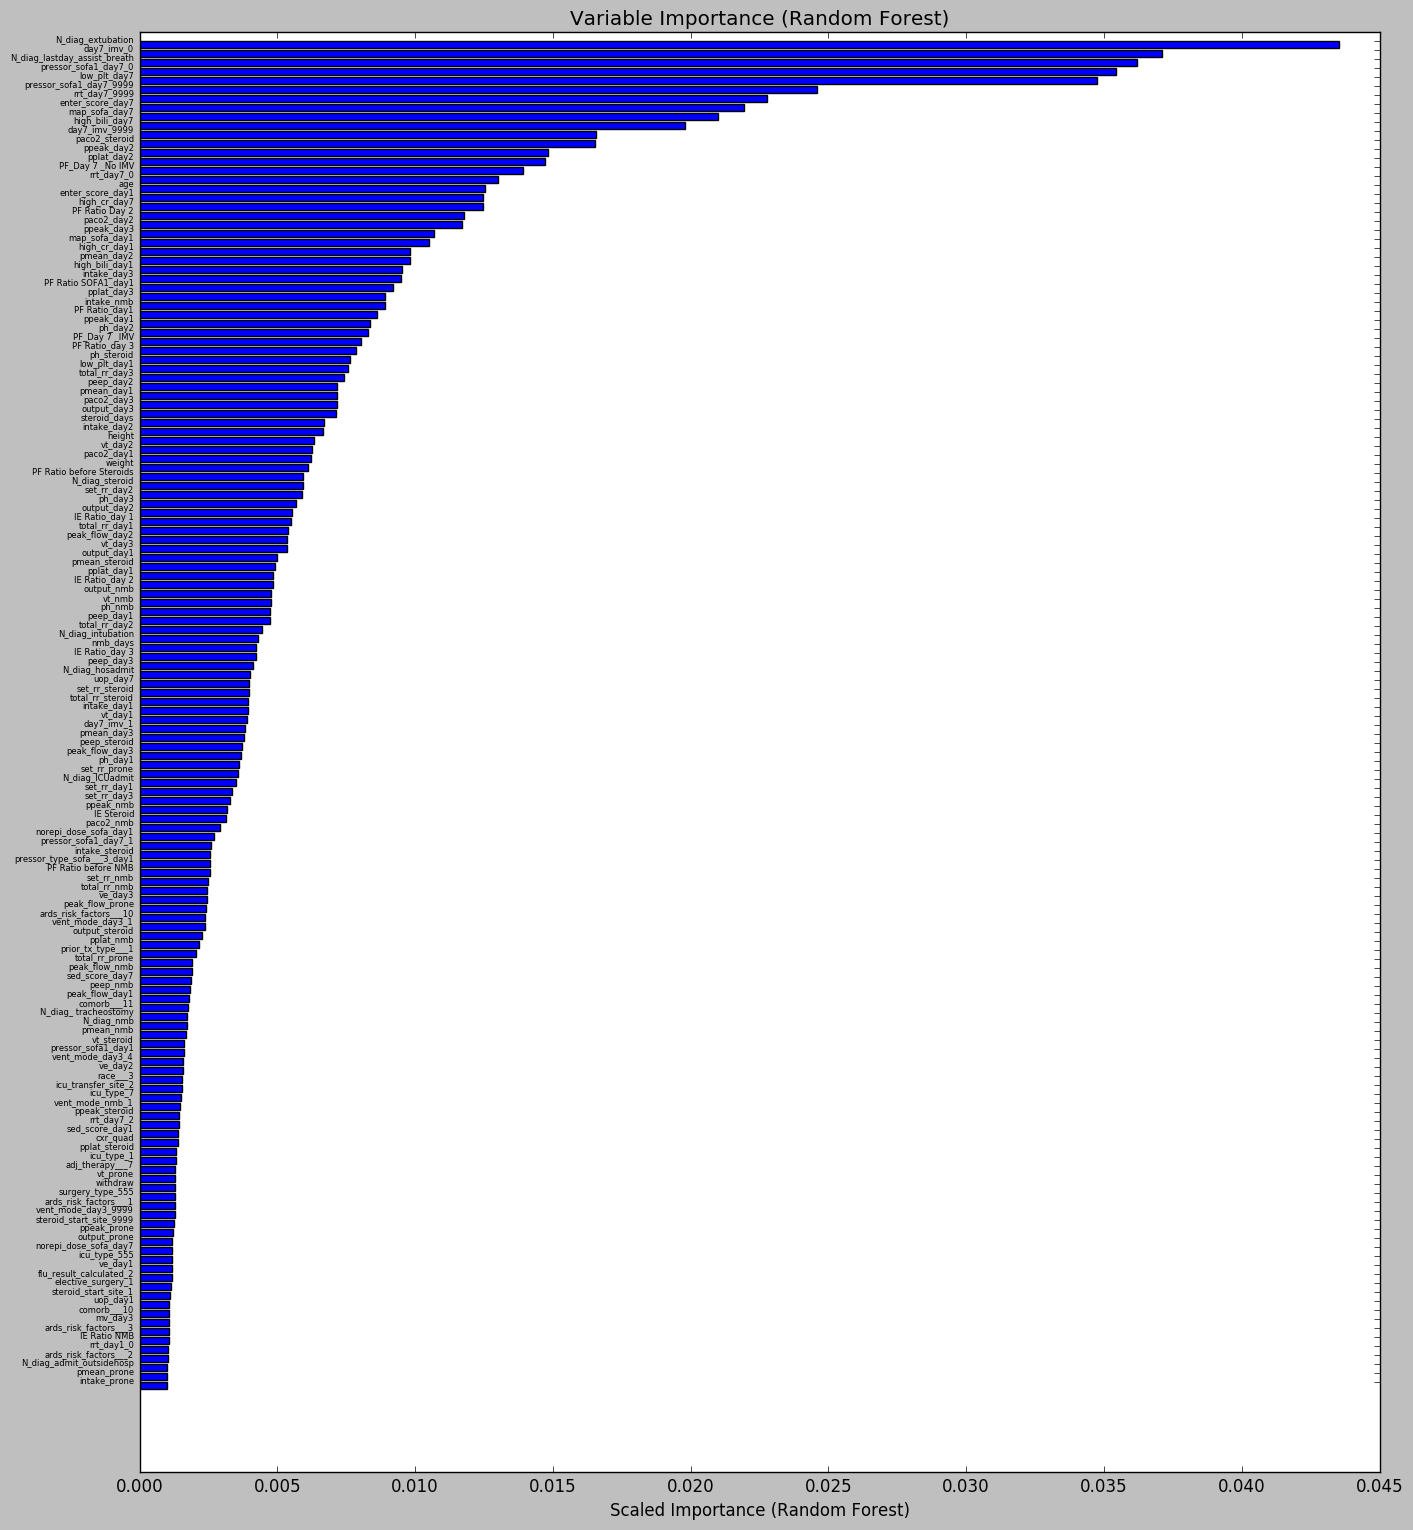

In [16]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rnd_clf.fit(train_set_std,train_set_out)
y_pred_rf=rnd_clf.predict(test_set_std)
y_test_pred=pd.DataFrame(y_pred_rf, index=test_set_out.index, columns=test_set_out.columns)
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(test_set_out,y_test_pred))


#print(list(zip(train_set_std, rnd_clf.feature_importances_)))
importance = rnd_clf.feature_importances_
#importance = pd.DataFrame(importance, index=test_set_t.columns,
                          #columns=["Importance"])
importance = pd.DataFrame(importance, columns=["Importance"])
importance['Features']=test_set_t.columns
importance_sorted=importance.sort_values(by="Importance", ascending=False)

importance_sorted["Std"] = np.std([tree.feature_importances_
                            for tree in rnd_clf.estimators_], axis=0)
importance_sorted['rank']=importance['Importance'].rank(method='dense',ascending=False)

 

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)
#plt.figure(colors=['red' if importance_sorted['Importance'] >= 0.01 else 'blue' ])
importance_sorted_subrow=importance_sorted[importance_sorted['Importance'] >= 0.001]

index_pos =importance_sorted_subrow['rank'].values
feature_importance=importance_sorted_subrow['Importance'].values
error=importance_sorted_subrow['Std'].values
ax.barh(index_pos, feature_importance)
lists=tuple(importance_sorted_subrow['Features'])
#print(lists)
ax.set_yticks(index_pos)
ax.set_yticklabels(lists,fontsize=6)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance (Random Forest)')
ax.set_title('Variable Importance (Random Forest)')

plt.show()
fig.savefig('test2png.png', dpi=600)


C:\Users\mzhang1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mzhang1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


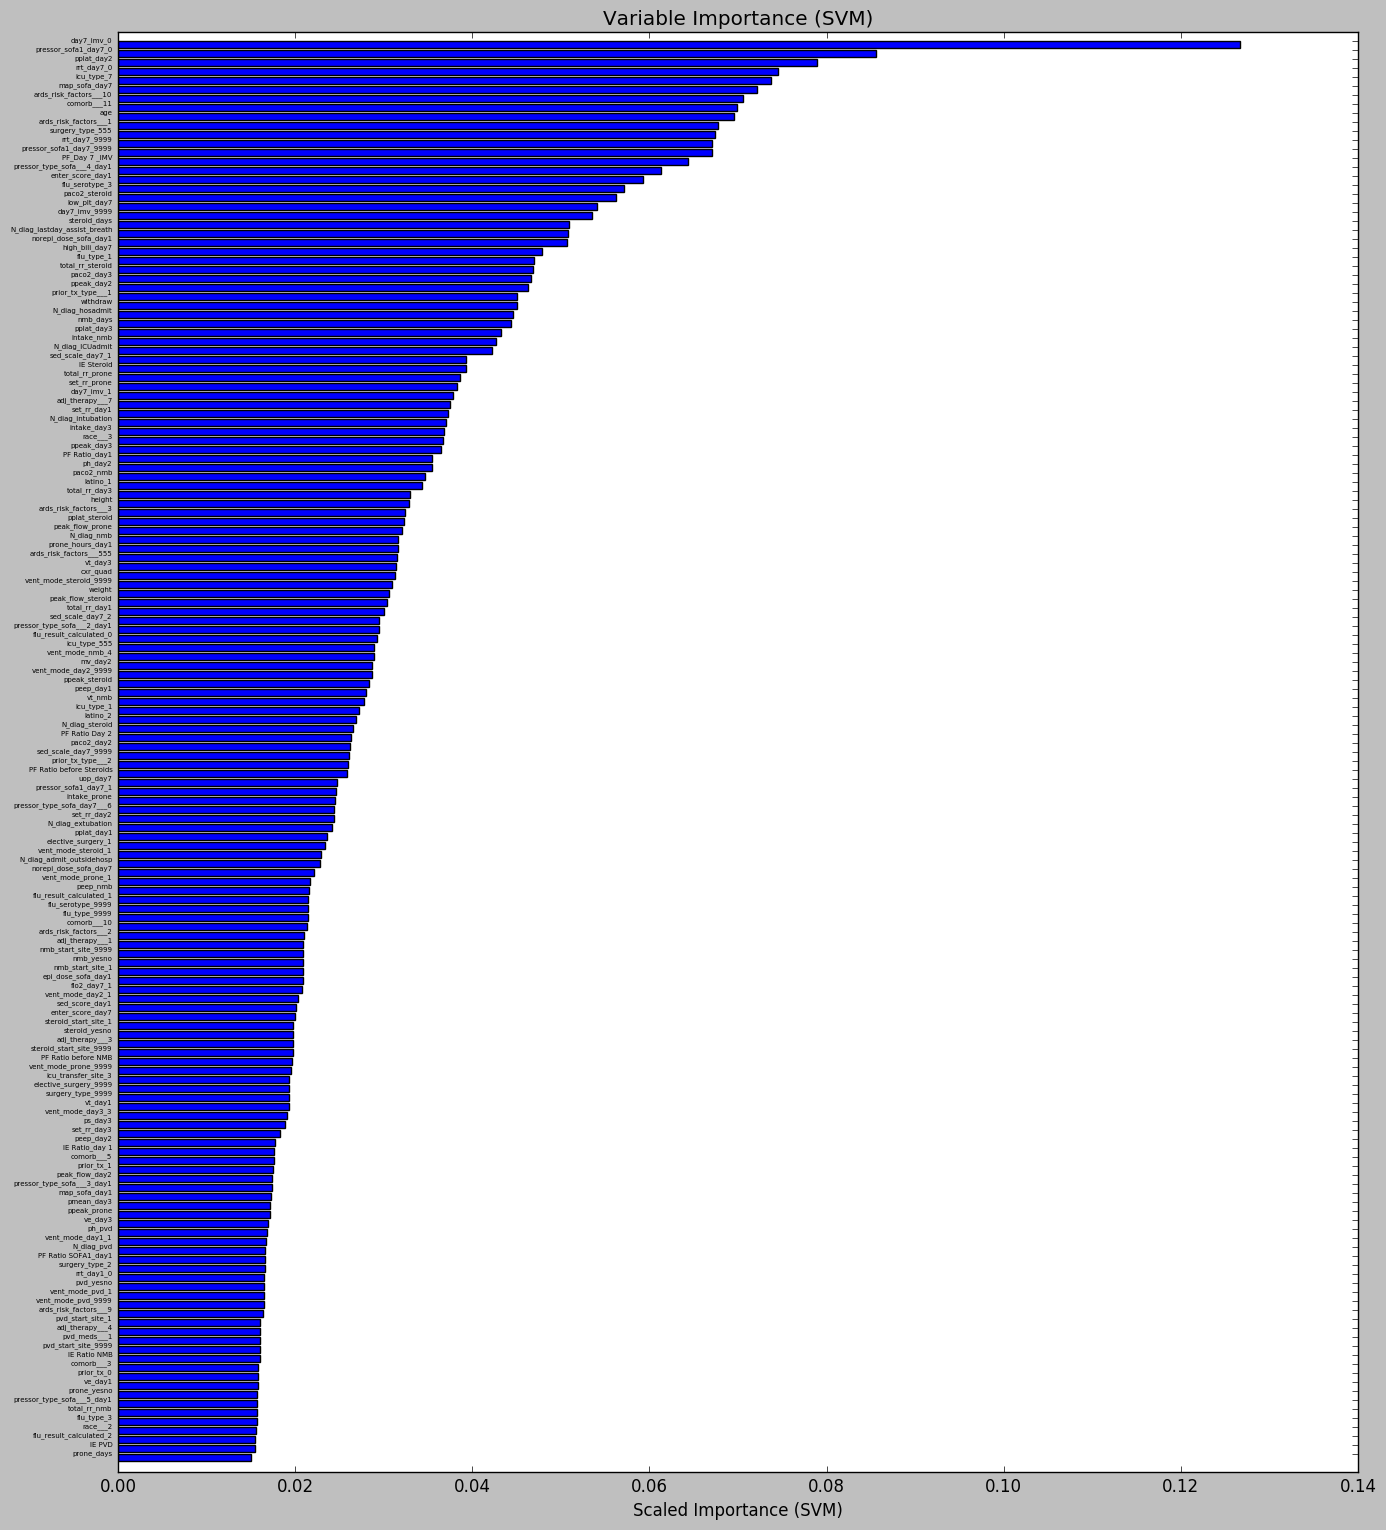

In [17]:
#########SVM###########

from sklearn import svm, grid_search

from sklearn.grid_search import GridSearchCV

#def svc_param_selection(X, y, nfolds):
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

grid_search = GridSearchCV(svm.SVC(kernel='rbf',random_state=42), param_grid, cv=3)
grid_search.fit(train_set_std,train_set_out.values.ravel())
a=grid_search.best_params_

svr=svm.SVC(C=10,kernel='rbf', gamma=0.001)
svr.fit(train_set_std,train_set_out.values.ravel())
y_pred_svr=svr.predict(test_set_std)
y_test_pred_svr=pd.DataFrame(y_pred_svr, index=test_set_out.index, columns=test_set_out.columns)
#print(confusion_matrix(test_set_out,y_test_pred_svr))

###SVM Variable Importance
svl = svm.SVC(kernel='linear')
svl.fit(train_set_std,train_set_out.values.ravel())
importance_svm=pd.DataFrame(abs(svl.coef_)).T
importance_svm['Features']=test_set_t.columns
importance_svm.rename(columns={importance_svm.columns[0]:'Importance'}, inplace=True)
importance_svm_sorted=importance_svm.sort_values(by="Importance", ascending=False)
importance_svm_sorted['rank_graph']=importance_svm_sorted['Importance'].rank(method='first',ascending=False)
importance_svm_sorted['rank']=importance_svm_sorted['Importance'].rank(method='dense',ascending=False)

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)

importance_svm_sorted_subrow=importance_svm_sorted[importance_svm_sorted['Importance'] >= 0.015]
index_pos_svm =importance_svm_sorted_subrow['rank_graph'].values
feature_importance_svm=importance_svm_sorted_subrow['Importance'].values
ax.barh(index_pos_svm, feature_importance_svm)
lists_svm=tuple(importance_svm_sorted_subrow['Features'])
#print(lists_svm)
ax.set_yticks(index_pos_svm)
ax.set_yticklabels(lists_svm,fontsize=5)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance (SVM)')
ax.set_title('Variable Importance (SVM)')

plt.show()
fig.savefig('test3png.png', dpi=400)


C:\Users\mzhang1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


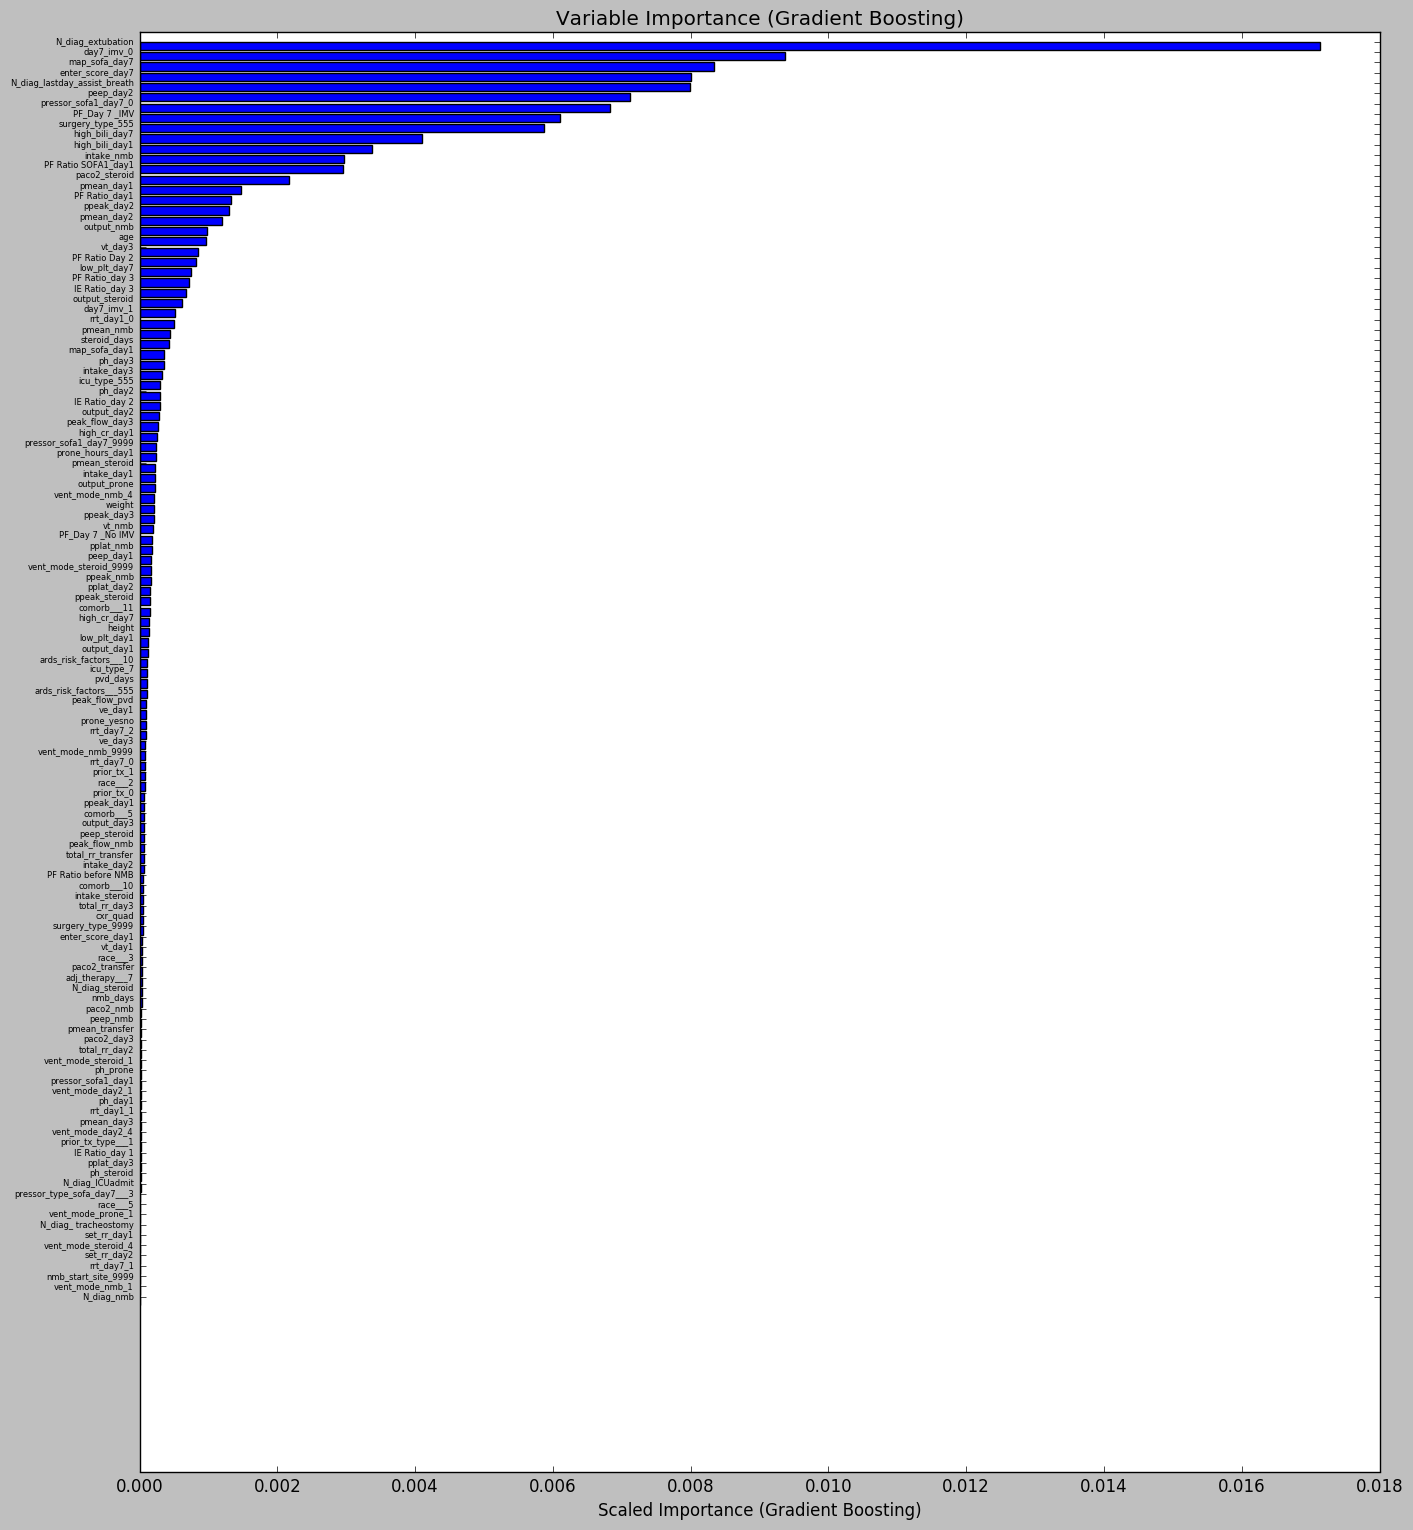

In [18]:
####Gradient Boosting


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gb.fit(train_set_std,train_set_out)
y_pred_gb=gb.predict(test_set_std)
y_test_pred_gb=pd.DataFrame(y_pred_gb, index=test_set_out.index, columns=test_set_out.columns)
#print(confusion_matrix(test_set_out,y_test_pred_gb))


#print(list(zip(train_set_std, gb.feature_importances_)))
importance_gb = gb.feature_importances_
#importance = pd.DataFrame(importance, index=test_set_t.columns,
                          #columns=["Importance"])
importance_gb = pd.DataFrame(importance_gb, columns=["Importance"])
importance_gb['Features_gb']=test_set_t.columns
importance_gb_sorted=importance_gb.sort_values(by="Importance", ascending=False)
importance_gb_sorted['rank']=importance_gb_sorted['Importance'].rank(method='dense',ascending=False)

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)
#plt.figure(colors=['red' if importance_sorted['Importance'] >= 0.01 else 'blue' ])
importance_gb_sorted_subrow=importance_gb_sorted[importance_gb_sorted['Importance'] >0]

index_pos_gb =importance_gb_sorted_subrow['rank'].values
feature_importance_gb=importance_gb_sorted_subrow['Importance'].values
ax.barh(index_pos_gb, feature_importance_gb)
lists_gb=tuple(importance_gb_sorted_subrow['Features_gb'])
#print(lists_gb)
ax.set_yticks(index_pos_gb)
ax.set_yticklabels(lists_gb,fontsize=6)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance (Gradient Boosting)')
ax.set_title('Variable Importance (Gradient Boosting)')

plt.show()
fig.savefig('test4png.png', dpi=400)


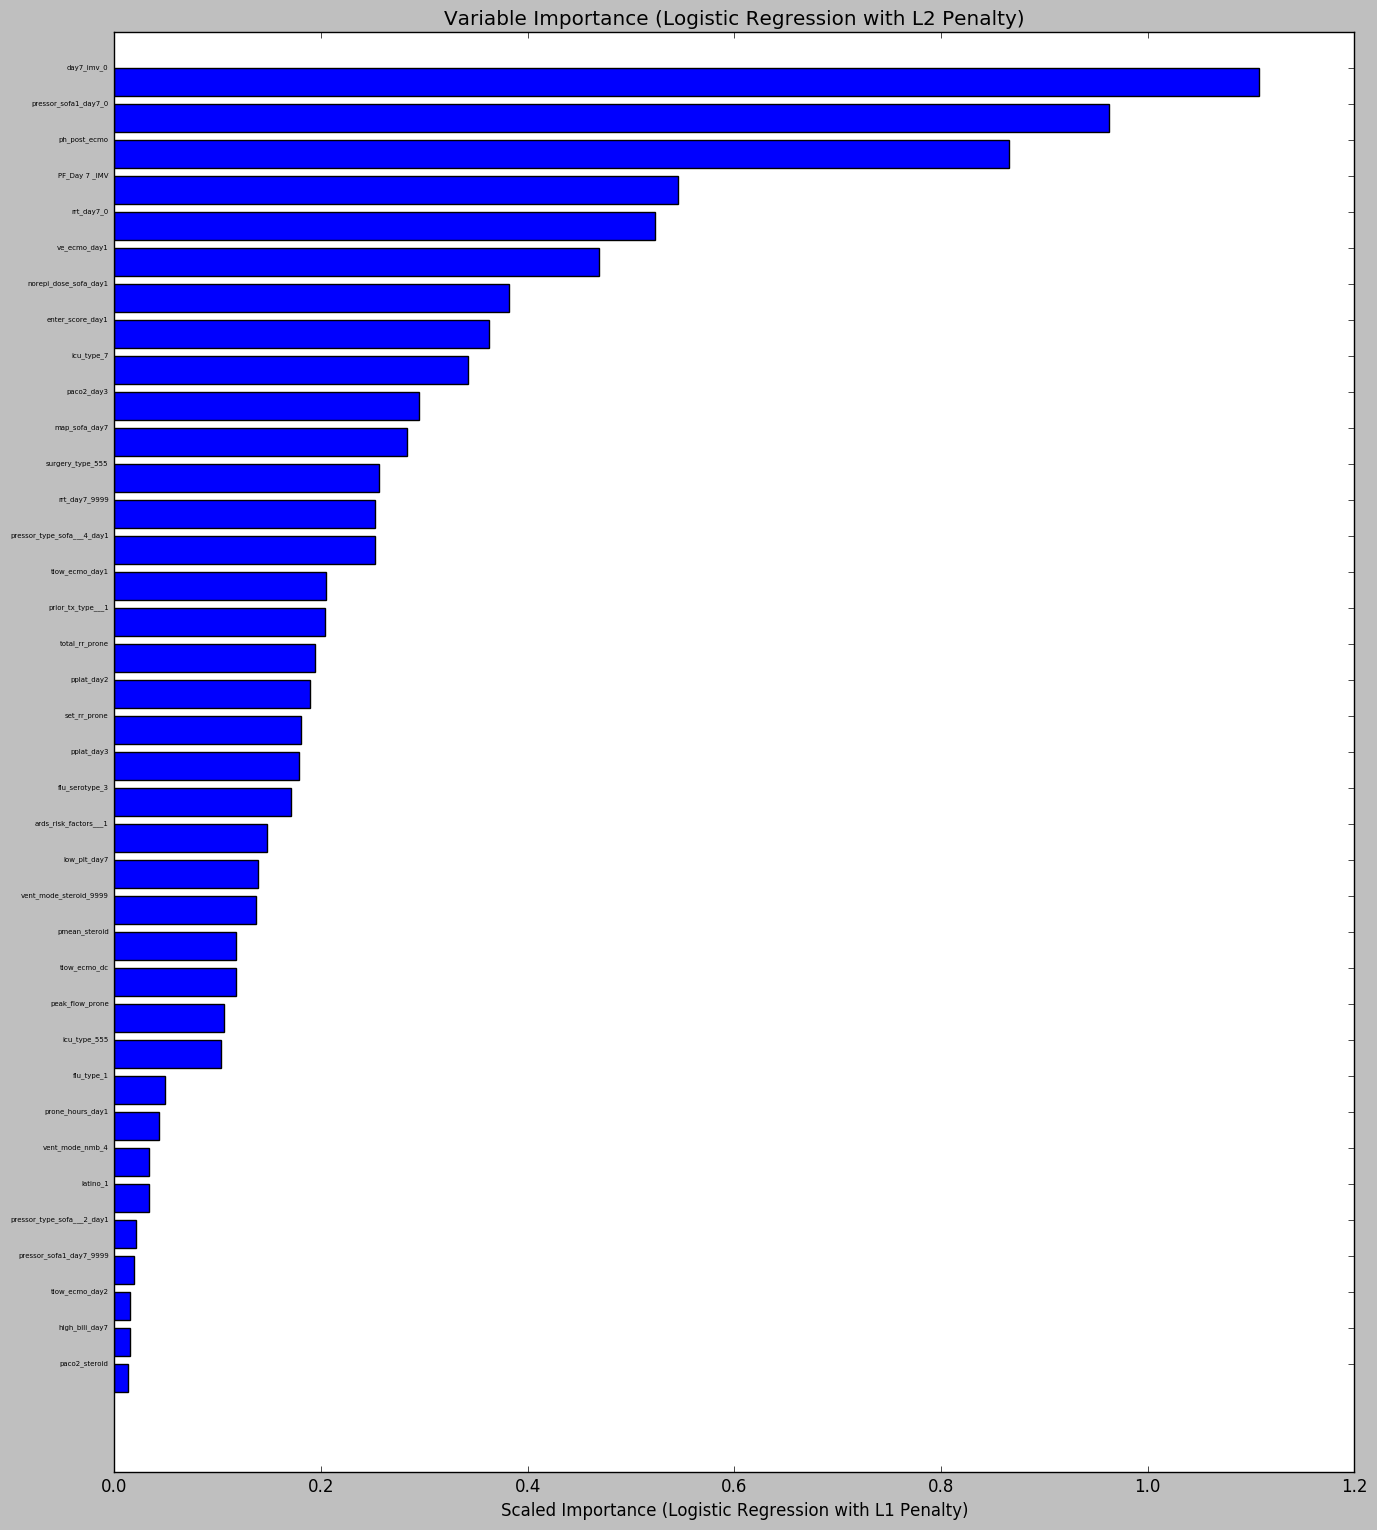

In [19]:
###Logistic Regression with L1 penalty
from sklearn.linear_model import LogisticRegression

LR_l1=LogisticRegression(C=1, penalty='l1', tol=0.01, random_state=42)
LR_l1.fit(train_set_std,train_set_out.values.ravel())
a=LR_l1.coef_.ravel()
importance_LR_l1=pd.DataFrame(abs(LR_l1.coef_)).T
importance_LR_l1['Features_lrl1']=test_set_t.columns
importance_LR_l1.rename(columns={importance_LR_l1.columns[0]:'Importance_lrl1'}, inplace=True)
importance_LR_l1_sorted=importance_LR_l1.sort_values(by="Importance_lrl1", ascending=False)
importance_LR_l1_sorted['rank_graph']=importance_LR_l1_sorted['Importance_lrl1'].rank(method='first',ascending=False)
importance_LR_l1_sorted['rank_lrl1']=importance_LR_l1_sorted['Importance_lrl1'].rank(method='dense',ascending=False)



plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)

importance_LR_l1_sorted_subrow=importance_LR_l1_sorted[importance_LR_l1_sorted['Importance_lrl1'] >0]
index_pos_lrl1 =importance_LR_l1_sorted_subrow['rank_graph'].values
feature_importance_lrl1=importance_LR_l1_sorted_subrow['Importance_lrl1'].values
ax.barh(index_pos_lrl1, feature_importance_lrl1)
lists_lrl1=tuple(importance_LR_l1_sorted_subrow['Features_lrl1'])
#print(lists_lrl1)
ax.set_yticks(index_pos_lrl1)
ax.set_yticklabels(lists_lrl1,fontsize=5)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance (Logistic Regression with L1 Penalty)')
ax.set_title('Variable Importance (Logistic Regression with L2 Penalty)')

plt.show()
fig.savefig('test5png.png', dpi=400)


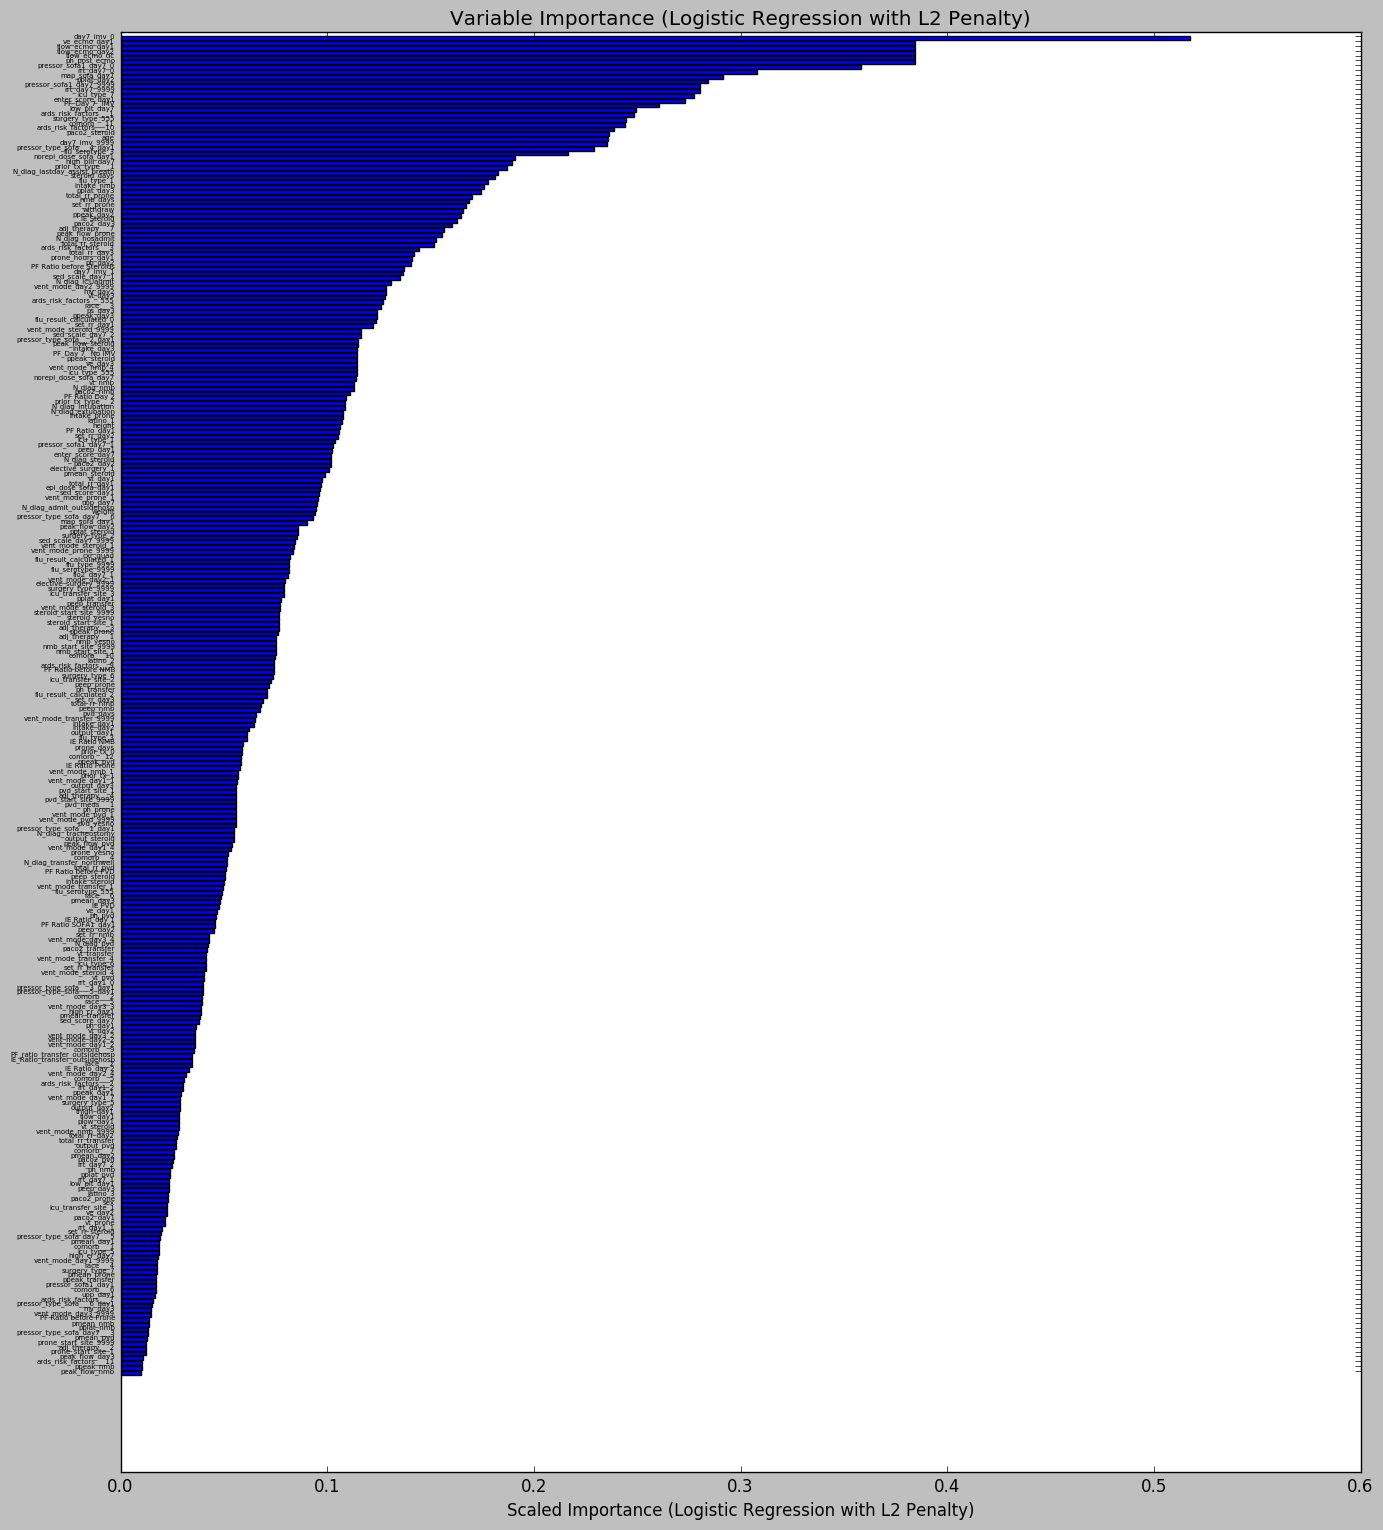

In [20]:
###Logistic Regression with L2 penalty


from sklearn.linear_model import LogisticRegression

LR_l2=LogisticRegression(C=1, penalty='l2', tol=0.01, random_state=42)
LR_l2.fit(train_set_std,train_set_out.values.ravel())
b=LR_l2.coef_.ravel()
importance_LR_l2=pd.DataFrame(abs(LR_l2.coef_)).T
importance_LR_l2['Features_lrl2']=test_set_t.columns
importance_LR_l2.rename(columns={importance_LR_l2.columns[0]:'Importance_lrl2'}, inplace=True)
importance_LR_l2_sorted=importance_LR_l2.sort_values(by="Importance_lrl2", ascending=False)
importance_LR_l2_sorted['rank_graph']=importance_LR_l2_sorted['Importance_lrl2'].rank(method='first',ascending=False)
importance_LR_l2_sorted['rank_lrl2']=importance_LR_l2_sorted['Importance_lrl2'].rank(method='dense',ascending=False)



plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)

importance_LR_l2_sorted_subrow=importance_LR_l2_sorted[importance_LR_l2_sorted['Importance_lrl2'] >=0.01]
index_pos_lrl2 =importance_LR_l2_sorted_subrow['rank_graph'].values
feature_importance_lrl2=importance_LR_l2_sorted_subrow['Importance_lrl2'].values
ax.barh(index_pos_lrl2, feature_importance_lrl2)
lists_lrl2=tuple(importance_LR_l2_sorted_subrow['Features_lrl2'])
#print(lists_lrl2)
ax.set_yticks(index_pos_lrl2)
ax.set_yticklabels(lists_lrl2,fontsize=5)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance (Logistic Regression with L2 Penalty)')
ax.set_title('Variable Importance (Logistic Regression with L2 Penalty)')

plt.show()
fig.savefig('test6png.png', dpi=400)


In [21]:
###Merge ranking from RF, SVM, GB, Logistic Regression L1 and Logistic Regression L2
importance_RF=importance_sorted.sort_index(axis=0)
importance_RF.rename(columns={importance_RF.columns[0]:'Importance_RF',importance_RF.columns[1]:'Features_RF', importance_RF.columns[2]:'Std_RF', importance_RF.columns[3]:'Rank_RF'}, inplace=True)
importance_SV=importance_svm_sorted.sort_index(axis=0)
importance_SV.rename(columns={importance_SV.columns[0]:'Importance_SV',importance_SV.columns[1]:'Features_SV', importance_SV.columns[3]:'Rank_SV'}, inplace=True)
importance_SV=importance_SV.drop(['rank_graph'],axis=1)
importance_GB=importance_gb_sorted.sort_index(axis=0)
importance_GB.rename(columns={importance_GB.columns[0]:'Importance_GB', importance_GB.columns[2]:'Rank_GB'}, inplace=True)
importance_LRL1=importance_LR_l1_sorted.sort_index(axis=0)
importance_LRL1=importance_LRL1.drop(['rank_graph'],axis=1)
importance_LRL2=importance_LR_l2_sorted.sort_index(axis=0)
importance_LRL2=importance_LRL2.drop(['rank_graph'],axis=1)
importance_RF_SV_GB_LRl1_LRl2=pd.concat([importance_RF, importance_SV, importance_GB, importance_LRL1, importance_LRL2],axis=1)
importance_RF_SV_GB_LRl1_LRl2['Rank_Avg'] = importance_RF_SV_GB_LRl1_LRl2[['Rank_RF', 'Rank_SV', 'Rank_GB', 'rank_lrl1','rank_lrl2']].mean(axis=1)
importance_RF_SV_GB_LRl1_LRl2_sorted=importance_RF_SV_GB_LRl1_LRl2.sort_values(by="Rank_Avg")

